<a href="https://colab.research.google.com/github/olivier2106/SP/blob/master/vix_ux_intraday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving ES_01-01-2012_01-05-2020.csv to ES_01-01-2012_01-05-2020.csv
Saving SPX_01-01-2012_01-05-2020.csv to SPX_01-01-2012_01-05-2020.csv
Saving TVIX_01-01-2012_01-05-2020.csv to TVIX_01-01-2012_01-05-2020.csv
Saving UX1_01-01-2012_01-05-2020.csv to UX1_01-01-2012_01-05-2020.csv
Saving UX2_01-01-2012_01-05-2020.csv to UX2_01-01-2012_01-05-2020.csv
Saving UX3_01-01-2012_01-05-2020.csv to UX3_01-01-2012_01-05-2020.csv
Saving VIX_01-01-2012_01-05-2020.csv to VIX_01-01-2012_01-05-2020.csv
Saving VXX_.csv to VXX_.csv
Saving VXX_old_01-01-2012_01-19-2019.csv to VXX_old_01-01-2012_01-19-2019.csv


In [0]:
#just use the name to which file is saved

In [0]:
vxx = pd.read_csv('VXX_old_01-01-2012_01-19-2019.csv')
spx = pd.read_csv('SPX_01-01-2012_01-05-2020.csv')
tvix = pd.read_csv('TVIX_01-01-2012_01-05-2020.csv')
"""
ux1 = pd.read_csv('UX1_01-01-2012_01-05-2020.csv')
ux2 = pd.read_csv('UX2_01-01-2012_01-05-2020.csv')
ux3 = pd.read_csv('UX3_01-01-2012_01-05-2020.csv')
"""

In [0]:
aggregation_col = ['Date and Time']

# VXX

In [0]:
columns_to_study = [''Close'']
# [ 'Open', 'High', 'Low', 'Close', 'Volume', 'Tick Count', 'Up Ticks', 'Down Ticks', 'Same Ticks',
 #                  'adjusted_close']

In [0]:
#il faut ensuite determiner le prix de reference, ie le close du jour d avant

,Open_vxx,High_vxx,Low_vxx,Close_vxx,Volume_vxx,Tick Count_vxx,Up Ticks_vxx,Down Ticks_vxx,Same Ticks_vxx,adjusted_close_vxx,Date and Time
0,19.00,19.20,18.85,19.15,744,76,12,9,55,19.15,07/02/2012 13:10
1,19.15,19.35,19.10,19.30,176,25,5,3,17,19.30,07/02/2012 13:20
2,19.35,19.50,19.35,19.45,120,49,8,5,36,19.45,07/02/2012 13:30
3,19.45,19.45,19.40,19.45,134,41,3,3,35,19.45,07/02/2012 13:40
4,19.45,19.45,19.30,19.30,65,12,0,3,9,19.30,07/02/2012 13:50
...,...,...,...,...,...,...,...,...,...,...,...
203711,14.80,14.85,14.65,14.70,2818,489,42,46,401,14.70,12/31/2019 21:10
203712,14.71,14.75,14.60,14.63,2718,472,44,48,380,14.63,12/31/2019 21:20
203713,14.65,14.65,14.60,14.61,476,81,11,12,58,14.61,12/31/2019 21:40
203714,14.60,14.65,14.60,14.61,221,37,5,6,26,14.61,12/31/2019 21:50


In [0]:
vxx['adjusted_close'] = vxx['Close']
                                                           
vxx['adjusted_close'] = vxx['adjusted_close'].fillna(method = 'ffill')

In [0]:
vxx['adjusted_close'].describe()

count    203716.000000
mean         15.803210
std           3.187328
min           9.600000
25%          13.700000
50%          15.250000
75%          17.280000
max          33.200000
Name: adjusted_close, dtype: float64

In [0]:
vxx.columns

Index(['Open_vxx', 'High_vxx', 'Low_vxx', 'Close_vxx', 'Volume_vxx',
       'Tick Count_vxx', 'Up Ticks_vxx', 'Down Ticks_vxx', 'Same Ticks_vxx',
       'adjusted_close_vxx', 'Date and Time'],
      dtype='object')

In [0]:
vxx = vxx[columns_to_study + aggregation_col]
vxx.columns = [f'{col}_vxx' if col in columns_to_study else col for col in vxx.columns]

KeyError: ignored

In [0]:
def add_volats(df, name):
    df[f'volat_{name}_c_to_c_1d'] = df[f'Close_{name}'].rolling(24).std()
    df[f'volat_{name}_c_to_c_5d'] = df[f'Close_{name}'].rolling(24 * 5).std()
    df[f'volat_{name}_c_to_c_1m'] = df[f'Close_{name}'].rolling(24 * 5 * 5).std()

In [0]:
def add_ratio_ma(df, name, param = 'Close'):
    df[f'ratio_ma_{param}_{name}_10min_1d'] = df[f'{param}_{name}']/df[f'{param}_{name}'].rolling(24).mean()
    df[f'ratio_ma_{param}_{name}_1d_5d'] = df[f'{param}_{name}'].rolling(24).mean()/df[f'{param}_{name}'].rolling(24 * 5).mean()
    df[f'ratio_ma_{param}_{name}_1d_20d'] = df[f'{param}_{name}'].rolling(24).mean()/df[f'{param}_{name}'].rolling(24 * 5 * 5).mean()


In [0]:
def add_return(df, name):
    df[f'return_{name}_c_to_c_1d'] = df[f'Close_{name}'] - df[f'Close_{name}'].shift(9*6)
    df[f'return_{name}_c_to_c_1w'] = df[f'Close_{name}'] - df[f'Close_{name}'].shift(9*6*5)
    df[f'return_{name}_c_to_c_1m'] = df[f'Close_{name}'] - df[f'Close_{name}'].shift(9*6*5*4)


In [0]:
add_volats(vxx, 'vxx')

In [0]:
add_return(vxx, 'vxx')

In [0]:
vxx.columns

Index(['Open_vxx', 'High_vxx', 'Low_vxx', 'Close_vxx', 'Volume_vxx',
       'Tick Count_vxx', 'Up Ticks_vxx', 'Down Ticks_vxx', 'Same Ticks_vxx',
       'adjusted_close_vxx', 'Date and Time', 'volat_vxx_c_to_c_1d',
       'volat_vxx_c_to_c_5d', 'volat_vxx_c_to_c_1m', 'return_vxx_c_to_c_1d',
       'return_vxx_c_to_c_1w', 'return_vxx_c_to_c_1m'],
      dtype='object')

In [0]:
add_ratio_ma(vxx, 'vxx')
add_ratio_ma(vxx, 'vxx', 'Volume')
add_ratio_ma(vxx, 'vxx', 'adjusted_close')

# SPX

In [0]:
columns_to_study = [ 'Open', 'High', 'Low', 'Close', 'Tick Count', 'Up Ticks', 'Down Ticks', 'Same Ticks', 'adjusted_close']

In [0]:
spx['adjusted_close'] = spx['Close']
spx['adjusted_close'] = spx['adjusted_close'].fillna(method = 'ffill')

In [0]:
spx.columns

Index(['Unnamed: 0', 'Symbol', 'Date', 'Time', 'Open', 'High', 'Low', 'Close',
       'Tick Count', 'Up Ticks', 'Down Ticks', 'Same Ticks', 'Date and Time',
       'adjusted_close'],
      dtype='object')

In [0]:
spx = spx[columns_to_study + aggregation_col]
spx.columns = [f'{col}_spx' if col in columns_to_study else col for col in spx.columns]

In [0]:
add_volats(spx, 'spx')
add_ratio_ma(spx, 'spx')
add_ratio_ma(spx, 'spx', 'adjusted_close')
add_return(spx, 'spx')

,Open_spx,High_spx,Low_spx,Close_spx,Tick Count_spx,Up Ticks_spx,Down Ticks_spx,Same Ticks_spx,adjusted_close_spx,Date and Time,volat_spx_c_to_c_1d,volat_spx_c_to_c_5d,volat_spx_c_to_c_1m,ratio_ma_Close_spx_10min_1d,ratio_ma_Close_spx_1d_5d,ratio_ma_Close_spx_1d_20d,ratio_ma_adjusted_close_spx_10min_1d,ratio_ma_adjusted_close_spx_1d_5d,ratio_ma_adjusted_close_spx_1d_20d,return_spx_c_to_c_1d,return_spx_c_to_c_1w,return_spx_c_to_c_1m
0,1258.86,1281.39,1258.86,1281.34,120,86,28,6,1281.34,01/03/2012 14:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1281.27,1281.92,1279.32,1279.90,120,39,71,10,1279.90,01/03/2012 14:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1279.94,1280.85,1279.79,1280.13,120,54,57,9,1280.13,01/03/2012 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1280.11,1284.09,1279.43,1283.53,120,58,55,7,1283.53,01/03/2012 15:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283.65,1284.16,1283.28,1283.91,120,40,63,17,1283.91,01/03/2012 15:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84085,3224.92,3227.06,3224.92,3226.01,600,247,219,134,3226.01,12/31/2019 20:50,2.836591,10.084568,32.653612,1.002101,0.997139,1.006591,1.002101,0.997139,1.006591,0.00,20.64,125.60
84086,3225.98,3231.72,3224.86,3230.56,600,312,229,59,3230.56,12/31/2019 21:00,3.588939,10.057165,32.597113,1.003330,0.997339,1.006729,1.003330,0.997339,1.006729,2.69,25.19,129.53
84087,3229.70,3230.78,3229.70,3230.78,600,53,2,545,3230.78,12/31/2019 21:10,4.135934,10.008364,32.534098,1.003208,0.997550,1.006872,1.003208,0.997550,1.006872,6.71,12.14,127.76
84088,3230.78,3230.78,3230.78,3230.78,600,0,0,600,3230.78,12/31/2019 21:20,4.467939,9.941428,32.465816,1.003002,0.997781,1.007029,1.003002,0.997781,1.007029,7.11,12.99,129.45


## TVIX

In [0]:
columns_to_study = [ 'Open', 'High', 'Low', 'Close', 'Volume', 'Tick Count', 'Up Ticks', 'Down Ticks', 'Same Ticks']

In [0]:
vix.columns

Index(['Unnamed: 0', 'Symbol', 'Time', 'Date', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Tick Count', 'Up Ticks', 'Down Ticks', 'Same Ticks',
       'Date and Time'],
      dtype='object')

In [0]:
vix = vix[columns_to_study + aggregation_col]
vix.columns = [f'{col}_vix' if col in columns_to_study else col for col in vix.columns]

In [0]:
add_volats(vix, 'vix')
add_ratio_ma(vix, 'vix')
add_ratio_ma(vix, 'vix', 'Volume')

# UX 1 - 2 - 3

http://www.cfasociety.org/nashville/SiteCollectionDocuments/CFA%20Volatility%20Indices%20201203.ppt

In [0]:
columns_to_study = [ 'Open', 'High', 'Low', 'Close', 'Volume', 'Tick Count', 'Up Ticks', 'Down Ticks', 'Same Ticks']

In [0]:
ux1 = ux1[columns_to_study + aggregation_col]
ux1['returns_ux1'] = ux1.Close - ux1.Close.shift(9 * 6 * 5)
ux1.columns = [f'{col}_ux1' if col in columns_to_study else col for col in ux1.columns]

In [0]:
ux2 = ux2[columns_to_study + aggregation_col]
ux2.columns = [f'{col}_ux2' if col in columns_to_study else col for col in ux2.columns]

In [0]:
ux3 = ux3[columns_to_study + aggregation_col]
ux3.columns = [f'{col}_ux3' if col in columns_to_study else col for col in ux3.columns]

In [0]:
add_volats(ux1, 'ux1')
add_ratio_ma(ux1, 'ux1')
add_ratio_ma(ux1, 'ux1', 'Volume')

In [0]:
add_volats(ux2, 'ux2')
add_ratio_ma(ux2, 'ux2')
add_ratio_ma(ux2, 'ux2', 'Volume')

In [0]:
add_volats(ux3, 'ux3')
add_ratio_ma(ux3, 'ux3')
add_ratio_ma(ux3, 'ux3', 'Volume')

# Merge everything

In [0]:
df = vix.merge(spx)

In [0]:
df = df.merge(vix, on = 'Date and Time')

In [0]:
df = df.merge(ux1, on = 'Date and Time')

In [0]:
df = df.merge(ux2, on = 'Date and Time')

In [0]:
df = df.merge(ux3, on = 'Date and Time')

In [0]:
df

,Open_vix_x,High_vix_x,Low_vix_x,Close_vix_x,Volume_vix_x,Tick Count_vix_x,Up Ticks_vix_x,Down Ticks_vix_x,Same Ticks_vix_x,Date and Time,volat_vix_c_to_c_1d_x,volat_vix_c_to_c_5d_x,volat_vix_c_to_c_1m_x,ratio_ma_Close_vix_10min_1d_x,ratio_ma_Close_vix_1d_5d_x,ratio_ma_Close_vix_1d_20d_x,ratio_ma_Volume_vix_10min_1d_x,ratio_ma_Volume_vix_1d_5d_x,ratio_ma_Volume_vix_1d_20d_x,Open_spx,High_spx,Low_spx,Close_spx,Tick Count_spx,Up Ticks_spx,Down Ticks_spx,Same Ticks_spx,adjusted_close_spx,volat_spx_c_to_c_1d,volat_spx_c_to_c_5d,volat_spx_c_to_c_1m,ratio_ma_Close_spx_10min_1d,ratio_ma_Close_spx_1d_5d,ratio_ma_Close_spx_1d_20d,ratio_ma_adjusted_close_spx_10min_1d,ratio_ma_adjusted_close_spx_1d_5d,ratio_ma_adjusted_close_spx_1d_20d,return_spx_c_to_c_1d,return_spx_c_to_c_1w,return_spx_c_to_c_1m,...,ratio_ma_Close_ux1_1d_20d,ratio_ma_Volume_ux1_10min_1d,ratio_ma_Volume_ux1_1d_5d,ratio_ma_Volume_ux1_1d_20d,Open_ux2,High_ux2,Low_ux2,Close_ux2,Volume_ux2,Tick Count_ux2,Up Ticks_ux2,Down Ticks_ux2,Same Ticks_ux2,volat_ux2_c_to_c_1d,volat_ux2_c_to_c_5d,volat_ux2_c_to_c_1m,ratio_ma_Close_ux2_10min_1d,ratio_ma_Close_ux2_1d_5d,ratio_ma_Close_ux2_1d_20d,ratio_ma_Volume_ux2_10min_1d,ratio_ma_Volume_ux2_1d_5d,ratio_ma_Volume_ux2_1d_20d,Open_ux3,High_ux3,Low_ux3,Close_ux3,Volume_ux3,Tick Count_ux3,Up Ticks_ux3,Down Ticks_ux3,Same Ticks_ux3,volat_ux3_c_to_c_1d,volat_ux3_c_to_c_5d,volat_ux3_c_to_c_1m,ratio_ma_Close_ux3_10min_1d,ratio_ma_Close_ux3_1d_5d,ratio_ma_Close_ux3_1d_20d,ratio_ma_Volume_ux3_10min_1d,ratio_ma_Volume_ux3_1d_5d,ratio_ma_Volume_ux3_1d_20d
0,4.8000,4.8500,4.7000,4.7000,787001,1234,196,212,826,07/02/2012 14:40,0.085685,0.255362,0.405252,0.974851,0.954974,0.842751,17.620477,0.440480,0.286456,1362.33,1364.45,1360.93,1364.10,120,68,47,5,1364.10,2.674408,16.086486,15.419275,1.004531,1.016453,1.018794,1.004531,1.016453,1.018794,49.91,30.15,44.74,...,NaN,NaN,NaN,NaN,21.60,21.71,21.51,21.58,475,177,38,32,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.25,23.33,23.15,23.23,257,83,14,14,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.7100,4.7100,4.5700,4.5899,1000263,1816,227,223,1366,07/02/2012 14:50,0.094579,0.253296,0.407838,0.954821,0.953789,0.840582,11.592777,0.788539,0.554845,1364.30,1366.35,1364.30,1365.74,120,63,48,9,1365.74,2.959452,16.304055,15.466582,1.005368,1.016601,1.019110,1.005368,1.016601,1.019110,50.66,32.93,47.79,...,NaN,NaN,NaN,NaN,21.55,21.55,21.20,21.30,1482,488,110,119,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.20,23.21,22.90,22.98,331,166,26,33,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5900,4.6000,4.5300,4.5600,600198,1478,177,186,1115,07/02/2012 15:00,0.102156,0.252493,0.410570,0.951819,0.952139,0.838032,5.397632,0.972518,0.711351,1365.68,1366.15,1363.69,1363.69,120,34,75,11,1363.69,3.048460,16.484036,15.506067,1.003591,1.016658,1.019325,1.003591,1.016658,1.019325,47.59,29.95,45.64,...,NaN,NaN,NaN,NaN,21.25,21.30,21.10,21.22,1668,342,65,62,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.96,23.05,22.84,23.00,419,169,30,28,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.5600,4.7700,4.5588,4.7490,891071,2126,308,299,1519,07/02/2012 15:10,0.095848,0.248312,0.412464,0.993091,0.951734,0.836738,6.036683,1.212727,0.936887,1363.51,1363.76,1355.80,1356.60,120,53,63,4,1356.60,3.003990,16.575235,15.521330,0.998339,1.016527,1.019308,0.998339,1.016527,1.019308,38.19,24.44,41.74,...,NaN,NaN,NaN,NaN,21.25,21.85,21.24,21.75,1649,390,80,66,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.00,23.50,23.00,23.45,453,204,47,37,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.7477,4.7700,4.5824,4.6100,420382,1137,148,167,822,07/02/2012 15:20,0.095873,0.245462,0.414920,0.966804,0.950558,0.834612,2.546299,1.318792,1.043571,1356.60,1360.09,1356.46,1359.60,120,69,40,11,1359.60,2.952994,16.690044,15.540198,1.000443,1.016439,1.019357,1.000443,1.016439,1.019357,41.63,29.08,45.27,...,NaN,NaN,NaN,NaN,21.80,21.80,21.40,21.50,930,200,20,28,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.43,23.44,23.10,23.15,180,62,5,15,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,.

In [0]:
df['delta_with_future_1m'] = df['Close_vix_x'] - df['Close_ux1']
df['delta_with_future_2m'] = df['Close_vix_x'] - df['Close_ux2']
df['delta_with_future_3m'] = df['Close_vix_x'] - df['Close_ux3']

In [0]:
def add_rollings(df, name):
    df[f'mae_{name}_1d'] = df[name].rolling(6*9).std()
    df[f'mae_{name}_1w'] = df[name].rolling(6*9*5).std()
    df[f'mae_{name}_1m'] = df[name].rolling(6*9*5*4).std()

In [0]:
add_rollings(df, 'delta_with_future_1m')
add_rollings(df, 'delta_with_future_2m')
add_rollings(df, 'delta_with_future_3m')

# Time related

In [0]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df['day'] = df['Date and Time'].dt.dayofweek
df['hour'] = df['Date and Time'].dt.hour
df['minute'] = df['Date and Time'].dt.minute
df['month'] = df['Date and Time'].dt.month

# Build target

In [0]:
target_series = 0.125*df['Close_vix_x'] + df['Close_spx']

In [0]:
#we needto have the right reference point, ie 9pm previous day
#we determine this point and define it as ref
df['partial_reference_tvix']=np.where((df.hour==20)&(df.minute==50)),df['Close_vix_x'],0)
df['reference_tvix']=df['partial_reference_tvix'].fillna(method='ffill')

In [0]:
#we do the same for the other
df['partial_reference_spx']=np.where((df.hour==20)&(df.minute==50)),df['Close_spx_x'],0)
df['reference_spx']=df['partial_reference_spx'].fillna(method='ffill')

In [0]:
#we create the target
df['target']=df['reference_tvix'].shift(-1)+

In [0]:
df.head()

,Open_vix_x,High_vix_x,Low_vix_x,Close_vix_x,Volume_vix_x,Tick Count_vix_x,Up Ticks_vix_x,Down Ticks_vix_x,Same Ticks_vix_x,Date and Time,volat_vix_c_to_c_1d_x,volat_vix_c_to_c_5d_x,volat_vix_c_to_c_1m_x,ratio_ma_Close_vix_10min_1d_x,ratio_ma_Close_vix_1d_5d_x,ratio_ma_Close_vix_1d_20d_x,ratio_ma_Volume_vix_10min_1d_x,ratio_ma_Volume_vix_1d_5d_x,ratio_ma_Volume_vix_1d_20d_x,Open_spx,High_spx,Low_spx,Close_spx,Tick Count_spx,Up Ticks_spx,Down Ticks_spx,Same Ticks_spx,adjusted_close_spx,volat_spx_c_to_c_1d,volat_spx_c_to_c_5d,volat_spx_c_to_c_1m,ratio_ma_Close_spx_10min_1d,ratio_ma_Close_spx_1d_5d,ratio_ma_Close_spx_1d_20d,ratio_ma_adjusted_close_spx_10min_1d,ratio_ma_adjusted_close_spx_1d_5d,ratio_ma_adjusted_close_spx_1d_20d,return_spx_c_to_c_1d,return_spx_c_to_c_1w,return_spx_c_to_c_1m,...,ratio_ma_Close_ux2_10min_1d,ratio_ma_Close_ux2_1d_5d,ratio_ma_Close_ux2_1d_20d,ratio_ma_Volume_ux2_10min_1d,ratio_ma_Volume_ux2_1d_5d,ratio_ma_Volume_ux2_1d_20d,Open_ux3,High_ux3,Low_ux3,Close_ux3,Volume_ux3,Tick Count_ux3,Up Ticks_ux3,Down Ticks_ux3,Same Ticks_ux3,volat_ux3_c_to_c_1d,volat_ux3_c_to_c_5d,volat_ux3_c_to_c_1m,ratio_ma_Close_ux3_10min_1d,ratio_ma_Close_ux3_1d_5d,ratio_ma_Close_ux3_1d_20d,ratio_ma_Volume_ux3_10min_1d,ratio_ma_Volume_ux3_1d_5d,ratio_ma_Volume_ux3_1d_20d,delta_with_future_1m,delta_with_future_2m,delta_with_future_3m,mae_delta_with_future_1m_1d,mae_delta_with_future_1m_1w,mae_delta_with_future_1m_1m,mae_delta_with_future_2m_1d,mae_delta_with_future_2m_1w,mae_delta_with_future_2m_1m,mae_delta_with_future_3m_1d,mae_delta_with_future_3m_1w,mae_delta_with_future_3m_1m,day,hour,minute,month
0,4.8000,4.85,4.7000,4.7000,787001,1234,196,212,826,2012-07-02 14:40:00,0.085685,0.255362,0.405252,0.974851,0.954974,0.842751,17.620477,0.440480,0.286456,1362.33,1364.45,1360.93,1364.10,120,68,47,5,1364.10,2.674408,16.086486,15.419275,1.004531,1.016453,1.018794,1.004531,1.016453,1.018794,49.91,30.15,44.74,...,NaN,NaN,NaN,NaN,NaN,NaN,23.25,23.33,23.15,23.23,257,83,14,14,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.5500,-16.8800,-18.5300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14,40,7
1,4.7100,4.71,4.5700,4.5899,1000263,1816,227,223,1366,2012-07-02 14:50:00,0.094579,0.253296,0.407838,0.954821,0.953789,0.840582,11.592777,0.788539,0.554845,1364.30,1366.35,1364.30,1365.74,120,63,48,9,1365.74,2.959452,16.304055,15.466582,1.005368,1.016601,1.019110,1.005368,1.016601,1.019110,50.66,32.93,47.79,...,NaN,NaN,NaN,NaN,NaN,NaN,23.20,23.21,22.90,22.98,331,166,26,33,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.4301,-16.7101,-18.3901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14,50,7
2,4.5900,4.60,4.5300,4.5600,600198,1478,177,186,1115,2012-07-02 15:00:00,0.102156,0.252493,0.410570,0.951819,0.952139,0.838032,5.397632,0.972518,0.711351,1365.68,1366.15,1363.69,1363.69,120,34,75,11,1363.69,3.048460,16.484036,15.506067,1.003591,1.016658,1.019325,1.003591,1.016658,1.019325,47.59,29.95,45.64,...,NaN,NaN,NaN,NaN,NaN,NaN,22.96,23.05,22.84,23.00,419,169,30,28,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.3900,-16.6600,-18.4400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,15,0,7
3,4.5600,4.77,4.5588,4.7490,891071,2126,308,299,1519,2012-07-02 15:10:00,0.095848,0.248312,0.412464,0.993091,0.951734,0.836738,6.036683,1.212727,0.936887,1363.51,1363.76,1355.80,1356.60,120,53,63,4,1356.60,3.003990,16.575235,15.521330,0.998339,1.016527,1.019308,0.998339,1.016527,1.019308,38.19,24.44,41.74,...,NaN,NaN,NaN,NaN,NaN,NaN,23.00,23.50,23.00,23.45,453,204,47,37,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.7510,-17.0010,-18.7010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,15,10,7
4,4.7477,4.77,4.5824,4.6100,420382,1137,148,167,822,2012-07-02 15:20:00,0.095873,0.245462,0.414920,0.966804,0.950558,0.834612,2.546299,1.318792,1.043571,1356.60,1360.09,1356.46,1359.60,120,69,40,11,1359.60,2.952994,16.690044,15.540198,1.000443,1.016439,1.019357,1.000443,1.016439,1.019357,41.63,29.08,45.27,...,NaN,NaN,NaN,NaN,NaN,NaN,23.43,23.44,23.10,23.15,180,62,5,15,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.7400,-16.8900,-1

In [0]:
threshold_std = target_series.rolling(9*6).std() / 5

df['target_up'] = target_series.shift(-1) > target_series + threshold_std
df['target_down'] = target_series.shift(-1) < target_series - threshold_std
df['target_stay'] = np.abs(target_series.shift(-1) - target_series) <= threshold_std

In [0]:
targets_array = df[['target_down', 'target_stay', 'target_up']].values
df['target'] = np.array([elt.tolist().index(True) if True in elt else 1 for elt in targets_array])

In [0]:
df['bips'] = target_series.shift(-1)/target_series

In [0]:
df.drop(['target_down', 'target_stay', 'target_up'], axis = 1, inplace = True)

# Build cross features and choose final ones

In [0]:
df.columns

Index(['Open_vix_x', 'High_vix_x', 'Low_vix_x', 'Close_vix_x', 'Volume_vix_x',
       'Tick Count_vix_x', 'Up Ticks_vix_x', 'Down Ticks_vix_x',
       'Same Ticks_vix_x', 'Date and Time',
       ...
       'mae_delta_with_future_2m_1m', 'mae_delta_with_future_3m_1d',
       'mae_delta_with_future_3m_1w', 'mae_delta_with_future_3m_1m', 'day',
       'hour', 'minute', 'month', 'target', 'bips'],
      dtype='object', length=131)

In [0]:
df['Close_ux2'] = np.clip(df.Close_ux2, 0.001, 100)
df['Close_ux3'] = np.clip(df.Close_ux3, 0.001, 100)

In [0]:
df['close_ux1/ux2'] = df.Close_ux1/df.Close_ux2
df['close_ux2/ux3'] = df.Close_ux2/df.Close_ux3

In [0]:
add_rollings(df, 'close_ux1/ux2')


In [0]:
for name in ['vix', 'spx', 'ux1', 'ux2', 'ux3']:
    df['ratio_ticks_'+name] = df['Up Ticks_'+name]/np.clip(df['Down Ticks_'+name], 1, 10000)

KeyError: ignored

In [0]:
train_features = [
 'ratio_ma_Close_ux1_1d_20d',      
 'ratio_ma_Close_spx_10min_1d',
 'ratio_ma_Close_vix_10min_1d',

    
 'ratio_ticks_vix',

 'volat_spx_c_to_c_1d',
 'close_ux1/ux2', 
 'returns_ux1',
    
  'month', 'hour', 'day'
                 ]

In [0]:
np.abs(df.corr()['target']).sort_values().to_dict()

{'Close_spx': 0.009648906163926229,
 'Close_ux1': 0.009528504794981145,
 'Close_ux2': 0.00888425671293047,
 'Close_ux3': 0.007166692120335526,
 'Close_vix_x': 0.017258158602511404,
 'Close_vix_y': 0.017258158602511404,
 'Down Ticks_spx': 0.018103482109183854,
 'Down Ticks_ux1': 0.002565968956360386,
 'Down Ticks_ux2': 0.0026280618545173567,
 'Down Ticks_ux3': 0.0018301759169159111,
 'Down Ticks_vix_x': 0.009577492164665724,
 'Down Ticks_vix_y': 0.009577492164665724,
 'High_spx': 0.009687952979543998,
 'High_ux1': 0.009023798621951419,
 'High_ux2': 0.008373328049759798,
 'High_ux3': 0.00673321493175448,
 'High_vix_x': 0.01705908674268618,
 'High_vix_y': 0.01705908674268618,
 'Low_spx': 0.009655755496521047,
 'Low_ux1': 0.009114022764684069,
 'Low_ux2': 0.00845598201466464,
 'Low_ux3': 0.006745233954071457,
 'Low_vix_x': 0.017059440188681663,
 'Low_vix_y': 0.017059440188681663,
 'Open_spx': 0.009668171746869429,
 'Open_ux1': 0.008974616653410034,
 'Open_ux2': 0.008293691055488652,
 'Open

# Separate train from test

In [0]:
df_train = df[df['Date and Time']<'2018-06-01']
df_test = df[df['Date and Time']>'2018-06-01']

In [0]:
def build_X_Y(df, train_features):
    X = df[train_features]
    Y = df['target']
    return X, Y

In [0]:
df_train.shape

(56958, 136)

In [0]:
df_train = df_train.dropna(axis = 0)

In [0]:
df_train['close_ux1/ux2'].describe()

count    55879.000000
mean         0.942592
std          0.053172
min          0.787588
25%          0.908321
50%          0.936607
75%          0.967478
max          1.402141
Name: close_ux1/ux2, dtype: float64

In [0]:
df_train.shape

(55879, 136)

In [0]:
X_train, y_train = build_X_Y(df_train, train_features)
X_test, y_test = build_X_Y(df_test, train_features)

KeyError: ignored

# Build and choose model


In [0]:
from lightgbm import LGBMClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
model = LGBMClassifier(n_estimators=30, class_weight='balanced'
                      )

In [0]:
#model = RandomForestClassifier(n_estimators=20, n_jobs=-1, class_weight='balanced')

In [0]:
np.random.seed(42)
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=30, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
pred = model.predict(X_test)

# Study results

In [0]:
from sklearn.metrics import confusion_matrix, f1_score

In [0]:
cf = confusion_matrix(y_test, pred)

In [0]:
print(f1_score(pred, y_test, average = 'macro'))

0.37298419736502936


In [0]:
pd.Series(pred).value_counts()

1    8698
0    3605
2    3151
dtype: int64

In [0]:
cf

array([[1017, 1852,  901],
       [1669, 4953, 1396],
       [ 919, 1893,  854]])

In [0]:
cf/cf.sum(axis = 0)

array([[0.28210818, 0.21292251, 0.28594097],
       [0.4629681 , 0.56944125, 0.44303396],
       [0.25492372, 0.21763624, 0.27102507]])

In [0]:
model.feature_importances_

array([330, 291, 298, 321, 380, 351, 222, 122, 277, 108])

# Threshold study

In [0]:
pred_probas = model.predict_proba(X_test)

In [0]:
thresh = 0.4

In [0]:
good=0
total = 0
for proba, pred in zip(pred_probas.tolist(), y_test.tolist()):
    if max(proba)>thresh and np.argmax(proba) != 1:
        if np.argmax(proba) == pred:
            good+=1
        total+=1

In [0]:
good

148

In [0]:
total

540

In [0]:
len(pred_probas)

15454

In [0]:
print(good/total)

0.2740740740740741


# Teersheet

In [0]:
money = df_test[['Date and Time', 'bips']].copy()
money.index = money['Date and Time']
money['date'] = money.index.date

In [0]:
len(money)

15454

In [0]:
len(pred_probas)

15454

In [0]:
for i in range(3):
    money[f'proba_'+str(i)] = pred_probas[:,i]

In [0]:
COST_1W = 10**-4
SPREAD = 0#0.5 * 10**-4

IN_THRESHOLD = 0.4
OUT_THRESHOLD = 0.4


In [0]:
def compute_inv(inv, gain_market):
    return inv * gain_market + (1-inv) 

def choose_pose(proba_vector, last_pose):
    final_pose = last_pose
    
    thresh = OUT_THRESHOLD
    if last_pose == 1:
        thresh = IN_THRESHOLD

    if np.max(proba_vector)>thresh:
        final_pose = np.argmax(proba_vector)
    return final_pose, thresh

def compute_cost(pose, last_pose):
    if pose == last_pose:
        cost = 0
    elif pose == 1:
        cost = (COST_1W + SPREAD)
    else:
        cost = 2*(COST_1W + SPREAD)
    return cost
    

In [0]:
money_made = []
last_pose = 1
poses = [last_pose]
for proba, bips in zip(money[[f'proba_'+str(i) for i in range(3)]].values,
                       money['bips'].values):
    
    inv = 1
    pose, thresh = choose_pose(proba, last_pose)

    poses.append(pose)
    cost = compute_cost(pose, last_pose)
    
    if pose == 1:
        gain = 1
    elif pose == 0:
        gain = compute_inv(inv, 1/bips) 
    elif pose == 2:
        gain = compute_inv(inv, bips) 
    last_pose = pose
    money_made.append(gain - cost)

In [0]:
pd.Series(poses).value_counts()

1    11679
0     2103
2     1673
dtype: int64

In [0]:
money['money_made'] = money_made 
money.money_made -= 1

In [0]:
money['money_made']

Date and Time
2018-06-01 14:40:00    0.0
2018-06-01 14:50:00    0.0
2018-06-01 15:00:00    0.0
2018-06-01 15:10:00    0.0
2018-06-01 15:20:00    0.0
                      ... 
2019-12-31 20:40:00    0.0
2019-12-31 20:50:00    0.0
2019-12-31 21:00:00    0.0
2019-12-31 21:10:00    0.0
2019-12-31 21:20:00    0.0
Name: money_made, Length: 15454, dtype: float64

In [0]:
money['money_made'].describe()

count    15454.000000
mean         0.000006
std          0.001231
min         -0.009154
25%          0.000000
50%          0.000000
75%          0.000000
max          0.143672
Name: money_made, dtype: float64

In [0]:
!pip install pyfolio 
import pyfolio as pf

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=f75974d646b188fd80a1a682c7c288ab80d26d20d97d2bc7805aec4a220e6f82
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37089 sha256=1296756301097a1b1507cccef360366fba963a2faeb044ad36a4fb9a1d72a97f
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [0]:
money_made_daily = money.groupby('date')['money_made'].sum()

In [0]:
money_made_daily.index = pd.to_datetime(money_made_daily.index)

Start date,2018-06-01
End date,2019-12-31
Total months,18
,Backtest
Annual return,5.3%
Cumulative returns,8.2%
Annual volatility,12.3%
Sharpe ratio,0.48
Calmar ratio,0.67
Stability,0.04
Max drawdown,-8.0%


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.99,2018-10-26,2019-09-17,2019-11-29,286
1,2.85,2019-11-29,2019-12-27,NaT,NaN
2,2.24,2018-07-09,2018-10-03,2018-10-12,70
3,0.39,2018-06-26,2018-06-28,2018-06-29,4
4,0.38,2018-06-15,2018-06-18,2018-06-21,5


Stress Events,mean,min,max
New Normal,0.02%,-1.08%,14.17%


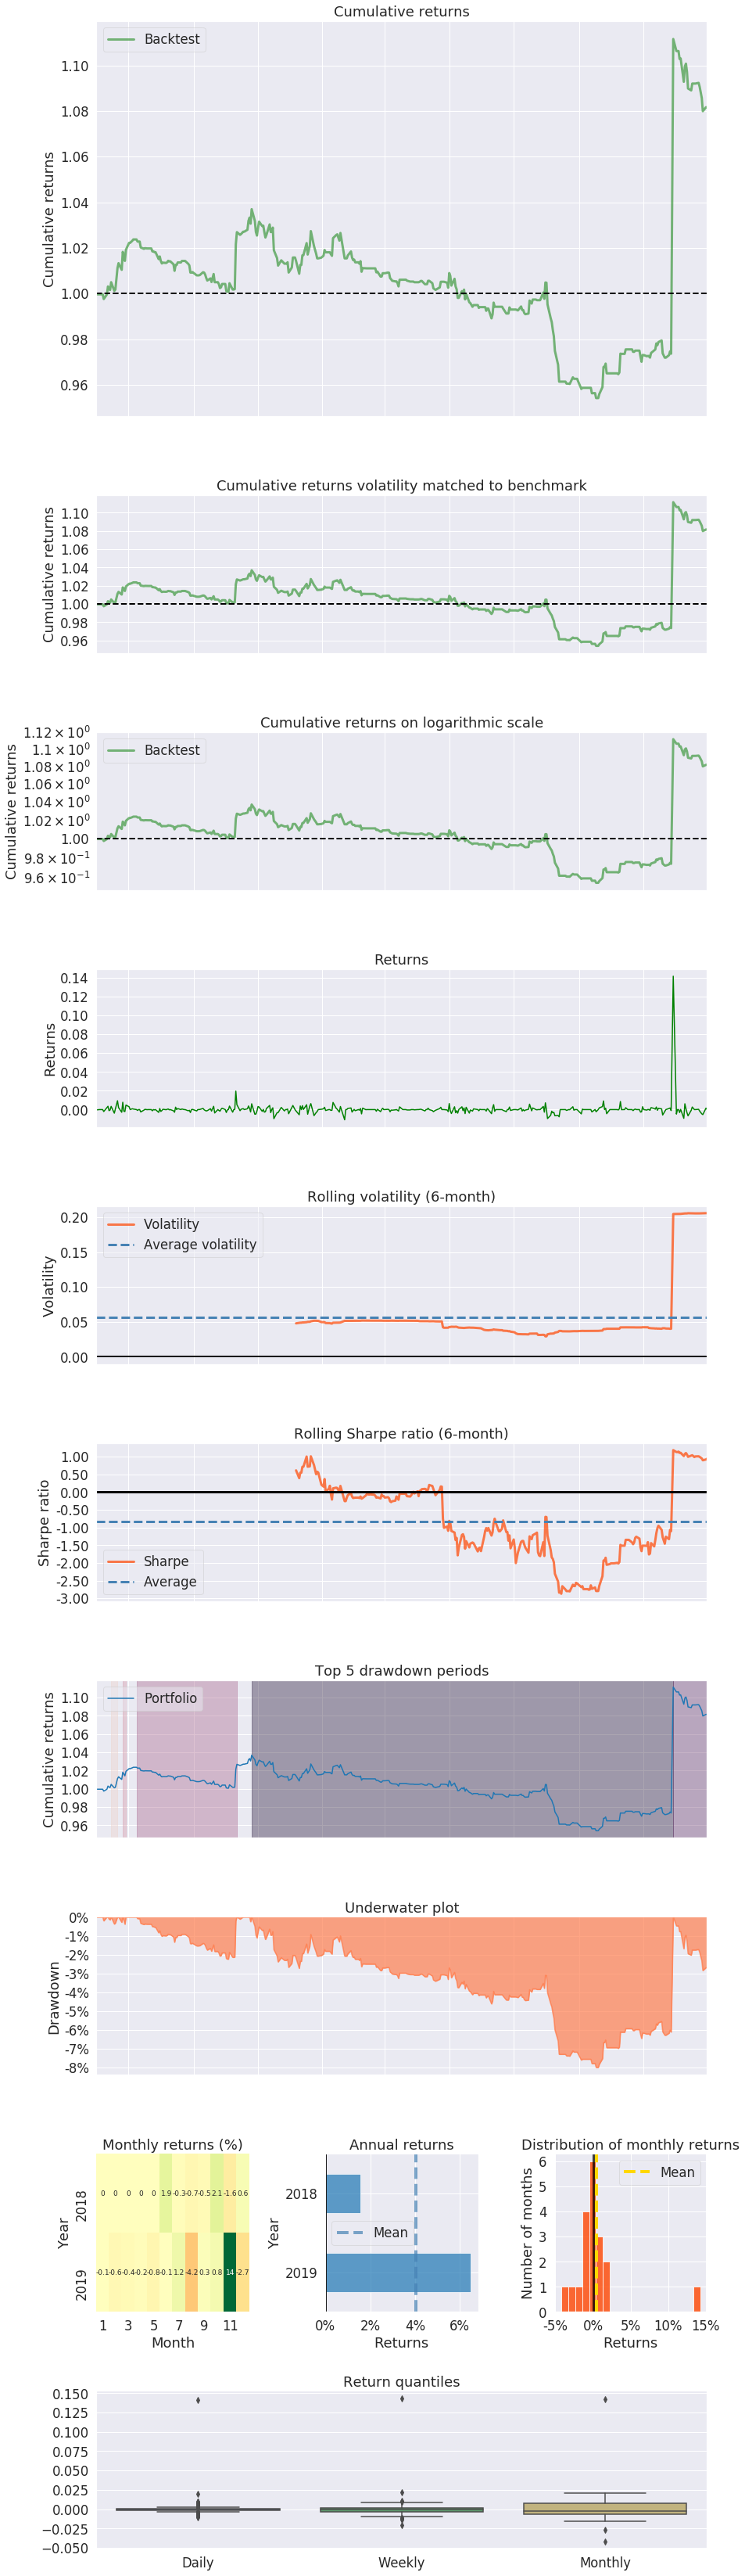

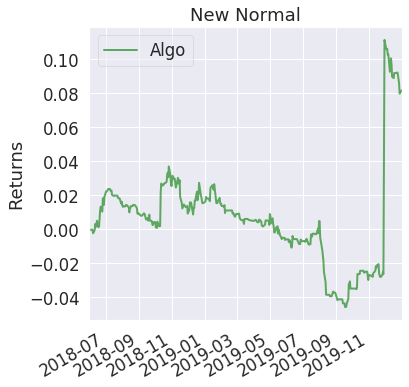

In [0]:
pf.create_full_tear_sheet(money_made_daily)

In [0]:
money_made

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1.0028986777583797,
 1.0002426906768642,
 1.000197571602375,
 0.9999,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.9999040600773514,
 1.000249718199948,
 1.000221916316744,
 1.0005026676049795,
 0.9998138638836337,
 1.0001411182749969,
 0.9991129375972391,
 0.9997676330127594,
 1.0003573039164673,
 0.998488069271395,
 1.0010557865088543,
 0.9995004180529488,
 0.9997431420667345,
 0.9993729667422393,
 1.0002105318743868,
 1.000114621938639,
 1.0000243109579907,
 1.000267414036806,
 1.0001527671689465,
 0.9998493390357699,
 1.000275674726044,
 1.000385282887886,
 0.9999,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.9997861251786384,
 1.0020361582861583,
 0.9990895716140199,
 0.9993000984020068,
 0.99